In [19]:
import matplotlib. pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import vega_datasets
%matplotlib inline

In [20]:
x = np.array([1,1,1,1,10,100,1000])
y = np.array([1000,100,10,1,1,1,1,])
ratio=x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


Text(0, 0.5, 'Ratio')

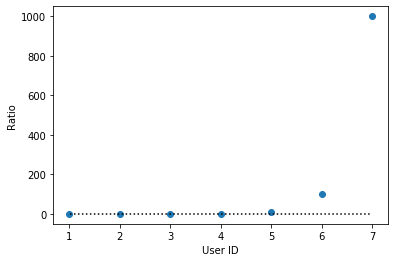

In [21]:
plt.scatter(np.array([1,2,3,4,5,6,7]), ratio,)
plt.axhline(y=1,linestyle=':',color='black',xmin=0.05,xmax=0.95)
plt.xlabel('User ID')
plt.ylabel('Ratio')

What's bad about it is that you cannot see any details between x=1 and x=5

Text(0, 0.5, 'Ratio')

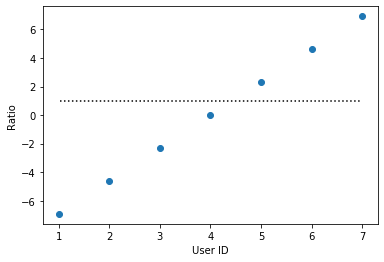

In [22]:
plt.scatter(np.array([1,2,3,4,5,6,7]), np.log(ratio),)
plt.axhline(y=1,linestyle=':',color='black',xmin=0.05,xmax=0.95)
plt.xlabel('User ID')
plt.ylabel('Ratio')

In [23]:
movies=vega_datasets.data.movies()
movies.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


In [24]:
movies.dropna(subset=['IMDB_Rating','IMDB_Votes','Rotten_Tomatoes_Rating',],inplace=True)

In [25]:
print(sum(movies.IMDB_Rating.isna()),sum(movies.IMDB_Votes.isna()),sum(movies.Rotten_Tomatoes_Rating.isna()))

0 0 0


/Users/Tal/anaconda3/envs/dviz/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121e79050>,
      dtype=object)

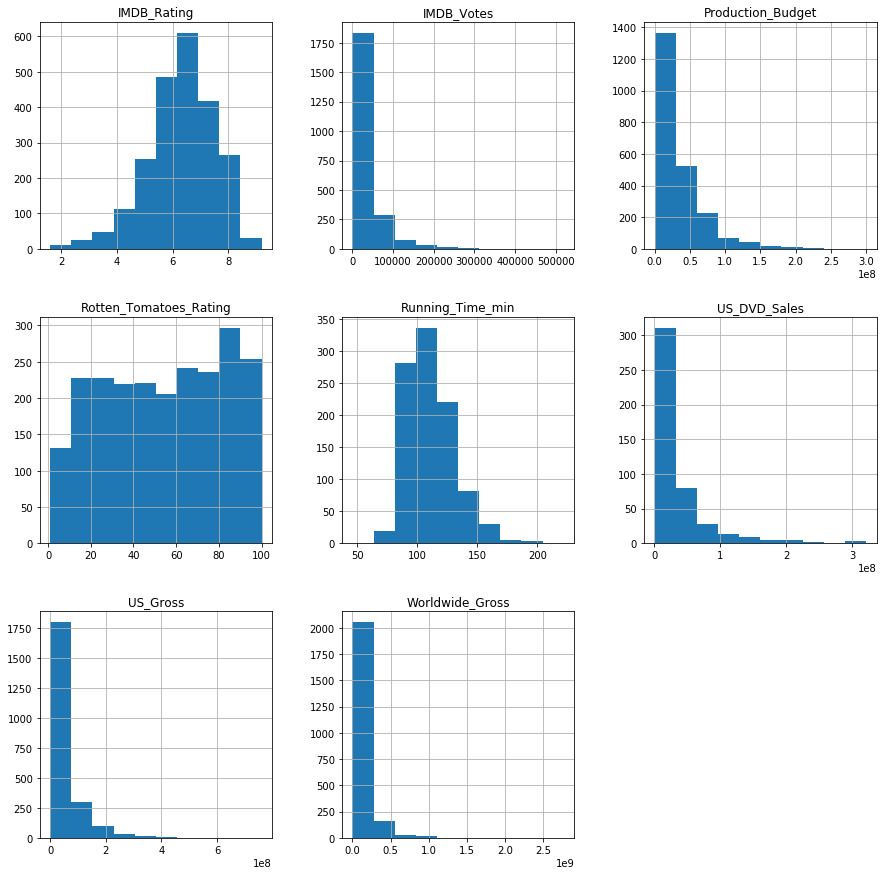

In [26]:
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
movies.hist(ax=ax)

Text(0, 0.5, 'Frequency')

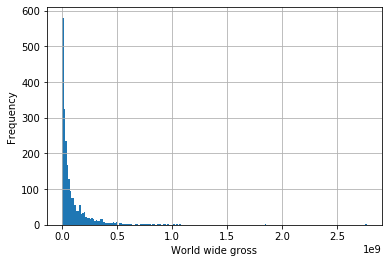

In [27]:
movies.Worldwide_Gross.hist(bins=200)
plt.xlabel('World wide gross')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

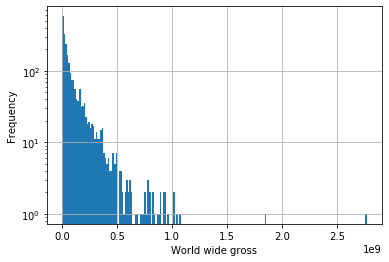

In [28]:
movies.Worldwide_Gross.hist(bins=200)
plt.yscale('log')
plt.xlabel('World wide gross')
plt.ylabel('Frequency')

In [29]:
movies.Worldwide_Gross=movies.Worldwide_Gross+1.0

In [30]:
bins=np.logspace(np.log10(min(movies.Worldwide_Gross)),
                 np.log10(max(movies.Worldwide_Gross)),20)

Text(0, 0.5, 'Frequency')

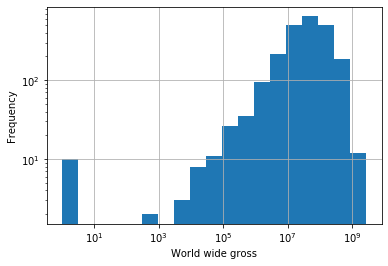

In [36]:
movies.Worldwide_Gross.hist(bins=bins)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('World wide gross')
plt.ylabel('Frequency')

### We should normalize it. 

Text(0, 0.5, 'Frequency')

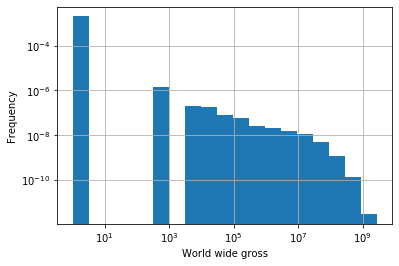

In [34]:
movies.Worldwide_Gross.hist(bins=bins,density=True)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('World wide gross')
plt.ylabel('Frequency')

### There are gaps because there are no values between 10^1 and 10^3. 

In [35]:
gross_sorted = movies.Worldwide_Gross.sort_values()
gross_sorted.head()

162     1.0
1519    1.0
457     1.0
734     1.0
942     1.0
Name: Worldwide_Gross, dtype: float64

In [51]:
N=len(gross_sorted)
N

2260

In [52]:
n=2260
np.linspace(1/n,1.0,num=n)

array([4.42477876e-04, 8.84955752e-04, 1.32743363e-03, ...,
       9.99115044e-01, 9.99557522e-01, 1.00000000e+00])

Text(0, 0.5, 'CCDF')

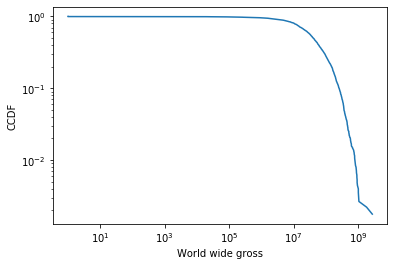

In [58]:
plt.plot(gross_sorted,1-np.linspace(1/n,1.0,num=n))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('World wide gross')
plt.ylabel('CCDF')

Text(0, 0.5, 'CCDF')

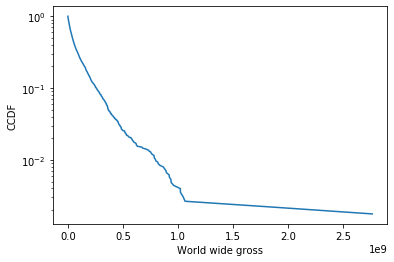

In [59]:
plt.plot(gross_sorted,1-np.linspace(1/n,1.0,num=n))
plt.yscale('log')
plt.xlabel('World wide gross')
plt.ylabel('CCDF')

In [63]:
max(movies.Worldwide_Gross)

2767891500.0

In [65]:
movies.loc[movies['Worldwide_Gross'] == max(movies.Worldwide_Gross)]

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
1234,Avatar,760167650.0,2.767892e+09,146153933.0,237000000.0,Dec 18 2009,PG-13,NaN,20th Century Fox,Original Screenplay,Action,Science Fiction,James Cameron,83.0,8.3,261439.0
